Nhóm 14 - Môn Phân tích dữ liệu - IE224.P21.LT 
Thành viên: 
   - Đoàn Chí Hưng - 24550014
   - Hoàng Minh Nhật - 24550031


Dataset: https://github.com/potatomat0/DA-notebook/blob/master/cleaned_data_IoT2023.csv

Mục tiêu đồ án: 

1. Thăm dò và tìm ra những biến ảnh hưởng đến từng loại tấn công mạng
2. Xây dựng mô hình chẩn đoán và phân loại tấn công  

## Phân tích thăm dò:

- Load dataset, head trước 5 cột, kiểm tra cột/nhãn bị thiếu
- In ra các loại tấn công ở biến 'labels'
- Dùng các biểu đồ trực quan để tìm ra các biến tương quan đến từng loại tấn công


## Xây dựng mô hình 

- Lựa chọn mô hình và kiểu huấn luyến 
- Xây dựng mô hình 
- Lựa chọn thang đo và trực quan
- Đánh giá mô hình
- kết luận 

## Exploratory Data Analysis

The following steps examine the cleaned IoT-23 dataset to understand feature quality and label distribution before modelling.

### Load and preview data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.float_format = "{:,.3f}".format

DATA_PATH = "cleaned_data_IoT2023.csv"
df = pd.read_csv(DATA_PATH)
display(df.head())

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.003,0,0,0.000,5.000,212.000,3.000,144.000,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,0.037,34,311,0.000,1.000,62.000,1.000,339.000,Benign,0,...,0,0,0,0,0,0,0,1,0,0
2,384.518,15072,0,0.000,48.000,"16,416.000",0.000,0.000,Benign,0,...,0,0,0,1,0,0,0,0,0,0
3,0.270,48,48,0.000,1.000,76.000,1.000,76.000,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,0.111,48,48,0.000,1.000,76.000,1.000,76.000,Benign,0,...,0,0,0,0,0,0,0,1,0,0


### Structural overview

In [2]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicated rows: {df.duplicated().sum()}")
display(df.dtypes.to_frame('dtype'))

Rows: 48003, Columns: 25
Duplicated rows: 0


,dtype
duration,float64
orig_bytes,int64
resp_bytes,int64
missed_bytes,float64
orig_pkts,float64
orig_ip_bytes,float64
resp_pkts,float64
resp_ip_bytes,float64
label,object
proto_icmp,int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48003 entries, 0 to 48002
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration           48003 non-null  float64
 1   orig_bytes         48003 non-null  int64  
 2   resp_bytes         48003 non-null  int64  
 3   missed_bytes       48003 non-null  float64
 4   orig_pkts          48003 non-null  float64
 5   orig_ip_bytes      48003 non-null  float64
 6   resp_pkts          48003 non-null  float64
 7   resp_ip_bytes      48003 non-null  float64
 8   label              48003 non-null  object 
 9   proto_icmp         48003 non-null  int64  
 10  proto_tcp          48003 non-null  int64  
 11  proto_udp          48003 non-null  int64  
 12  conn_state_OTH     48003 non-null  int64  
 13  conn_state_REJ     48003 non-null  int64  
 14  conn_state_RSTO    48003 non-null  int64  
 15  conn_state_RSTOS0  48003 non-null  int64  
 16  conn_state_RSTR    480

### Missing values

In [5]:
missing = df.isna().sum()
missing_percent = (missing / len(df) * 100).round(3)
missing_summary = pd.DataFrame({"missing": missing, "percent": missing_percent})
display(missing_summary.sort_values('missing', ascending=False))

,missing,percent
duration,0,0.000
orig_bytes,0,0.000
resp_bytes,0,0.000
missed_bytes,0,0.000
orig_pkts,0,0.000
orig_ip_bytes,0,0.000
resp_pkts,0,0.000
resp_ip_bytes,0,0.000
label,0,0.000
proto_icmp,0,0.000


### Summary statistics for numeric features

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
display(df[numeric_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
duration,"48,003.000",16.521,682.168,0.000,2.991,3.089,3.137,"78,840.329"
orig_bytes,"48,003.000","82,179.064","9,406,845.079",0.000,0.000,0.000,48.000,"1,744,830,458.000"
resp_bytes,"48,003.000","7,701.470","1,536,977.129",0.000,0.000,0.000,48.000,"336,516,351.000"
missed_bytes,"48,003.000",6.232,235.998,0.000,0.000,0.000,0.000,"20,272.000"
orig_pkts,"48,003.000","5,316.548","396,626.229",0.000,3.000,3.000,3.000,"66,027,354.000"
orig_ip_bytes,"48,003.000","231,265.830","15,630,218.954",0.000,180.000,180.000,180.000,"1,914,793,266.000"
resp_pkts,"48,003.000",8.861,"1,096.950",0.000,0.000,0.000,1.000,"239,484.000"
resp_ip_bytes,"48,003.000","8,155.717","1,596,823.016",0.000,0.000,0.000,76.000,"349,618,679.000"
proto_icmp,"48,003.000",0.009,0.094,0.000,0.000,0.000,0.000,1.000
proto_tcp,"48,003.000",0.868,0.339,0.000,1.000,1.000,1.000,1.000


### Label distribution

,count,percent
label,,
Benign,26001,54.170
PartOfAHorizontalPortScan,12369,25.770
C&C,5618,11.700
Attack,3814,7.950
Okiru,163,0.340
DDoS,36,0.070
FileDownload,2,0.000


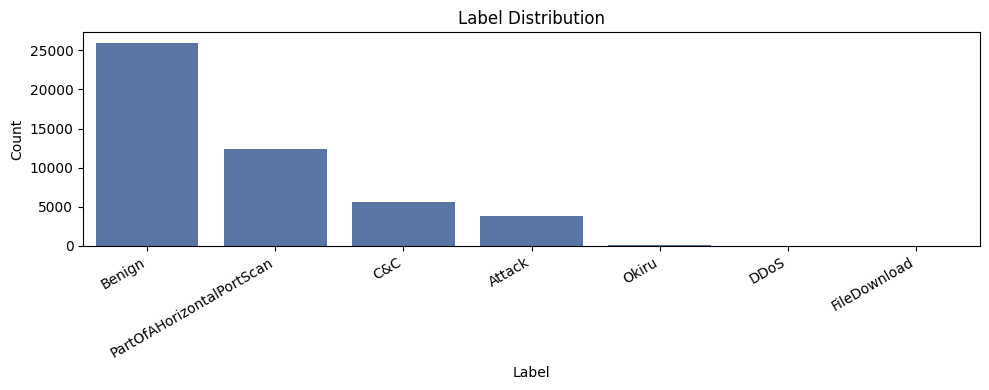

In [7]:
label_counts = df['label'].value_counts().rename_axis('label').to_frame('count')
label_counts['percent'] = (label_counts['count'] / len(df) * 100).round(2)
display(label_counts)

plt.figure(figsize=(10, 4))
sns.barplot(data=label_counts.reset_index(), x='label', y='count', color='#4C72B0')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Protocol and connection-state prevalence by label

In [8]:
proto_columns = [col for col in df.columns if col.startswith('proto_')]
conn_state_columns = [col for col in df.columns if col.startswith('conn_state_')]

proto_summary = df.groupby('label')[proto_columns].mean().round(3)
conn_summary = df.groupby('label')[conn_state_columns].mean().round(3)

display(proto_summary)
display(conn_summary)

,proto_icmp,proto_tcp,proto_udp
label,,,
Attack,0.000,1.000,0.000
Benign,0.016,0.757,0.227
C&C,0.000,1.000,0.000
DDoS,0.000,0.389,0.611
FileDownload,0.000,1.000,0.000
Okiru,0.000,1.000,0.000
PartOfAHorizontalPortScan,0.000,1.000,0.000


,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
label,,,,,,,,,,,,,
Attack,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
Benign,0.018,0.064,0.005,0.000,0.007,0.000,0.667,0.002,0.001,0.033,0.203,0.000,0.000
C&C,0.000,0.019,0.000,0.000,0.018,0.000,0.676,0.002,0.000,0.277,0.007,0.000,0.000
DDoS,0.028,0.000,0.000,0.000,0.000,0.000,0.972,0.000,0.000,0.000,0.000,0.000,0.000
FileDownload,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
Okiru,0.000,0.951,0.012,0.006,0.000,0.000,0.018,0.000,0.012,0.000,0.000,0.000,0.000
PartOfAHorizontalPortScan,0.000,0.049,0.001,0.000,0.020,0.000,0.844,0.000,0.000,0.000,0.085,0.000,0.000


### Core traffic metrics by label

In [9]:
core_columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'resp_pkts', 'orig_ip_bytes', 'resp_ip_bytes']
core_stats = df.groupby('label')[core_columns].agg(['mean', 'median', 'std']).round(3)
display(core_stats)

duration                        orig_bytes  \
                              mean  median       std            mean   
label                                                                  
Attack                       4.348   3.946     5.681         577.160   
Benign                      13.913   3.106   697.468       1,875.192   
C&C                         59.369   3.119 1,304.785          45.286   
DDoS                       988.304 204.813 1,507.844 108,072,289.972   
FileDownload                 0.888   0.888     0.451          83.500   
Okiru                        1.635   0.324    10.605           5.006   
PartOfAHorizontalPortScan    3.666   2.995     4.744         244.613   

                                                        resp_bytes             \
                                 median             std       mean     median   
label                                                                           
Attack                          589.000          79.718  1,716.588  1,801.000   
Benign                            0.000     180,665.925 13,789.781      0.000   
C&C                               0.000         529.805    692.229      0.000   
DDoS                      2,876,163.500 330,654,618.330      0.000      0.000   
FileDownload                     83.500           0.707 63,867.000 63,867.000   
Okiru                             0.000          63.914      0.000      0.000   
PartOfAHorizontalPortScan         0.000      26,480.167     47.041      0.000   

                                        missed_bytes  ...      orig_pkts  \
                                    std         mean  ...            std   
label                                                 ...                  
Attack                          523.138        0.000  ...          1.880   
Benign                    2,088,361.173        3.348  ...     89,043.235   
C&C                           8,214.109       36.972  ...        210.697   
DDoS                              0.000        0.000  ... 12,827,475.700   
FileDownload                    967.322    2,190.000  ...          1.414   
Okiru                             0.000        0.000  ...          0.974   
PartOfAHorizontalPortScan       226.406        0.000  ...        112.541   

                          resp_pkts                    orig_ip_bytes  \
                               mean median       std            mean   
label                                                                  
Attack                       14.880 15.000     2.141       1,304.820   
Benign                       10.939  0.000 1,486.897      19,258.905   
C&C                           9.495  0.000   221.919         597.438   
DDoS                          0.000  0.000     0.000 294,019,737.639   
FileDownload                 48.000 48.000     2.828       2,947.500   
Okiru                         0.982  1.000     0.135          76.540   
PartOfAHorizontalPortScan     2.474  0.000     8.941         617.751   

                                                         resp_ip_bytes  \
                                  median             std          mean   
label                                                                    
Attack                         1,325.000         182.638     2,481.749   
Benign                           180.000   2,591,224.135    14,371.710   
C&C                              180.000       8,892.439     1,115.706   
DDoS                      69,207,630.000 491,148,137.866         0.000   
FileDownload                   2,947.500         231.224    65,799.000   
Okiru                             40.000         420.061        39.337   
PartOfAHorizontalPortScan        180.000      27,034.243       157.541   

                                                    
                              median           std  
label                                               
Attack                     2,563.000       616.896  
Benign                         0.000 2,169,672.699  
C&C   

### Feature correlation with attack labels

In [10]:
label_dummies = pd.get_dummies(df['label'], prefix='label')
features = df.drop(columns='label')
corr_matrix = features.join(label_dummies).corr(numeric_only=True)
label_cols = label_dummies.columns
feature_cols = features.columns

corr_with_labels = corr_matrix.loc[feature_cols, label_cols]
display(corr_with_labels)

,label_Attack,label_Benign,label_C&C,label_DDoS,label_FileDownload,label_Okiru,label_PartOfAHorizontalPortScan
duration,-0.005,-0.004,0.023,0.039,-0.000,-0.001,-0.011
orig_bytes,-0.003,-0.009,-0.003,0.315,-0.000,-0.001,-0.005
resp_bytes,-0.001,0.004,-0.002,-0.000,0.000,-0.000,-0.003
missed_bytes,-0.008,-0.013,0.047,-0.001,0.060,-0.002,-0.016
orig_pkts,-0.004,-0.013,-0.005,0.458,-0.000,-0.001,-0.008
orig_ip_bytes,-0.004,-0.015,-0.005,0.515,-0.000,-0.001,-0.009
resp_pkts,0.002,0.002,0.000,-0.000,0.000,-0.000,-0.003
resp_ip_bytes,-0.001,0.004,-0.002,-0.000,0.000,-0.000,-0.003
proto_icmp,-0.028,0.087,-0.035,-0.003,-0.001,-0.006,-0.056
proto_tcp,0.115,-0.356,0.142,-0.039,0.003,0.023,0.230


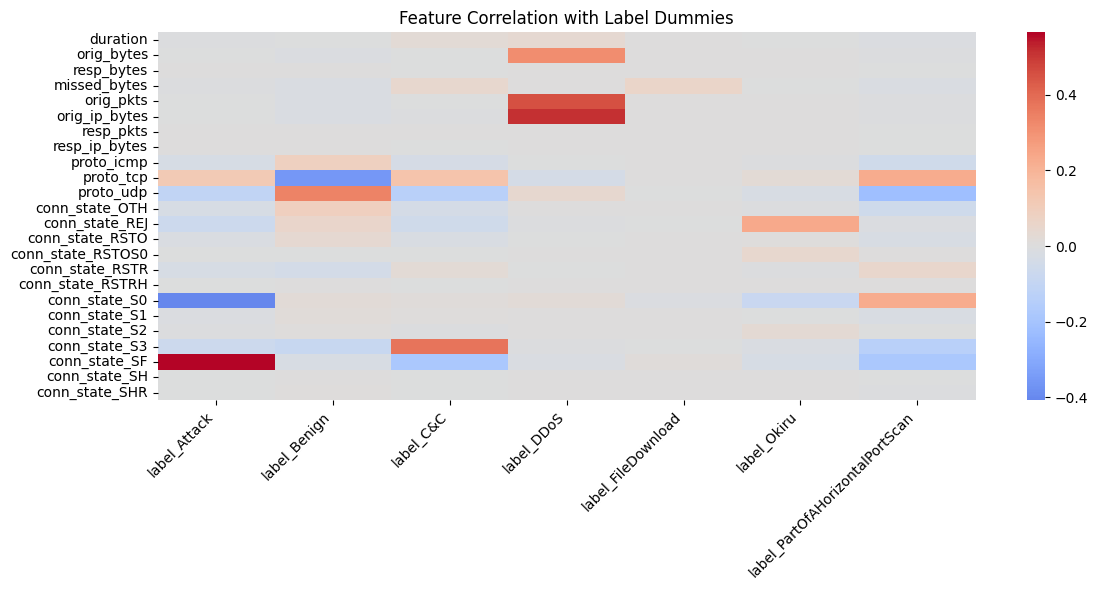

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_with_labels, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation with Label Dummies')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Top absolute correlations per label

In [15]:
abs_corr = corr_with_labels.abs()
top_features = {col: abs_corr[col].sort_values(ascending=False).head(5) for col in abs_corr.columns}
top_corr_df = (
      corr_with_labels.abs()
      .stack()
      .groupby(level=1)
      .nlargest(5)
      .reset_index(name='abs_corr')
  )
top_corr_df.rename(columns={'level_0': 'feature', 'level_1': 'label'}, inplace=True)
display(top_corr_df)


,feature,label,level_2,abs_corr
0,label_Attack,conn_state_SF,label_Attack,0.565
1,label_Attack,conn_state_S0,label_Attack,0.408
2,label_Attack,proto_tcp,label_Attack,0.115
3,label_Attack,proto_udp,label_Attack,0.110
4,label_Attack,conn_state_REJ,label_Attack,0.069
5,label_Benign,proto_tcp,label_Benign,0.356
6,label_Benign,proto_udp,label_Benign,0.342
7,label_Benign,conn_state_OTH,label_Benign,0.091
8,label_Benign,proto_icmp,label_Benign,0.087
9,label_Benign,conn_state_S3,label_Benign,0.085
